In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import pyplot

import sklearn
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split, KFold, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import(accuracy_score, roc_auc_score, f1_score, plot_confusion_matrix,
                            recall_score, confusion_matrix, precision_score, classification_report)

from sklearn.metrics import precision_recall_curve, f1_score, auc

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn import preprocessing
from IPython.display import display, HTML



%matplotlib inline

In [2]:
df=pd.read_csv('./data/churn.csv').drop(columns=['RowNumber','Surname', 'CustomerId', 'Geography'], axis=1)
df.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1


In [3]:
df['Gender']=df['Gender'].apply(lambda x: 0 if x=='Female' else 1)

In [4]:
y = df["Exited"]
X = df.drop(["Exited"], axis = 1)

In [5]:
y.shape, X.shape

((10000,), (10000, 9))

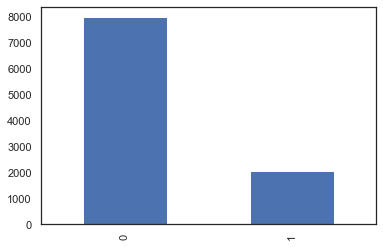

In [6]:
df.Exited.value_counts().plot(kind='bar');

unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy score can be misleading. In a dataset with unbalanced classes, the classifier will always “predicts” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.

In [7]:
X.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

## Data splitting

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.33, random_state=42)

It is important to train the models on a different subset
of the training data than the linear regression model to avoid
overfitting, in particular if the total number of leaves is
similar to the number of training samples.

In [10]:
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=23)

In [10]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_set=scaler.transform(X_train_set)#train set scaled

In [11]:
# X_val=scaler.transform(X_val)#validation set scaled

In [12]:
# X_test=scaler.transform(X_test)#holdout dataset scaled

# Modeling 



- GradientBoosting Classifier
- Random Forest Classifier


Skewed datasets are not uncommon. And they are tough to handle. Usual classification models and techniques often fail miserably when presented with such a problem. Although your model could get you to even a 99% accuracy on such cases, yet, if you are measuring yourself against a sensible metric such as the ROC Auc score, then you will face trouble getting up that leaderboard. This is because if the dataset is skewed

Although the algorithm performs well in general, even on imbalanced classification datasets, it offers a way to tune the training algorithm to pay more attention to misclassification of the minority class for datasets with a skewed class distribution.

This modified version of XGBoost is referred to as Class Weighted XGBoost or Cost-Sensitive XGBoost and can offer better performance on binary classification problems with a severe class imbalance.

In [12]:
y_train.value_counts(), y_val.value_counts(), y_test.value_counts()

(0    4257
 1    1103
 Name: Exited, dtype: int64,
 0    1049
 1     291
 Name: Exited, dtype: int64,
 0    2657
 1     643
 Name: Exited, dtype: int64)

In [13]:
# count examples in each class
from collections import Counter
counter = Counter(y_val)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 3.605


## Decision Tree

## RandomForestClassifier 

In [73]:
from sklearn.ensemble import RandomForestClassifier
# define model
model = RandomForestClassifier(random_state=random_state)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train_set, y_train_set, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
#print('Mean ROC AUC: %.5f' % mean(scores))
print("Mean ROC AUC: %.5f " % (scores.mean()))

Mean ROC AUC: 0.84596 


## Tuning

In [74]:
# define grid
param_grid= {'n_estimators':[10,50,100,500,1000],'max_features':[3,5,7], 'max_depth':[3,5,7],'max_samples':[0.5,0.7,1.0],'class_weight':[{0:1,1:1}]}
model =RandomForestClassifier(random_state=random_state, n_jobs=-1)

In [75]:
# define evaluation procedure
from sklearn.model_selection import GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid.fit(X_train_set, y_train_set)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.850062 using {'class_weight': {0: 1, 1: 1}, 'max_depth': 5, 'max_features': 7, 'max_samples': 0.7, 'n_estimators': 500}
0.830100 (0.012318) with: {'class_weight': {0: 1, 1: 1}, 'max_depth': 3, 'max_features': 3, 'max_samples': 0.5, 'n_estimators': 10}
0.825187 (0.010266) with: {'class_weight': {0: 1, 1: 1}, 'max_depth': 3, 'max_features': 3, 'max_samples': 0.5, 'n_estimators': 50}
0.826182 (0.009826) with: {'class_weight': {0: 1, 1: 1}, 'max_depth': 3, 'max_features': 3, 'max_samples': 0.5, 'n_estimators': 100}
0.819279 (0.007984) with: {'class_weight': {0: 1, 1: 1}, 'max_depth': 3, 'max_features': 3, 'max_samples': 0.5, 'n_estimators': 500}
0.819838 (0.008917) with: {'class_weight': {0: 1, 1: 1}, 'max_depth': 3, 'max_features': 3, 'max_samples': 0.5, 'n_estimators': 1000}
0.830100 (0.012176) with: {'class_weight': {0: 1, 1: 1}, 'max_depth': 3, 'max_features': 3, 'max_samples': 0.7, 'n_estimators': 10}
0.823756 (0.011698) with: {'class_weight': {0: 1, 1: 1}, 'max_depth': 3, 'ma

## Validation

In [76]:
#class_weight': {0: 1, 1: 1}, 'max_depth': 5, 'max_features': 7, 'max_samples': 0.7, 'n_estimators': 500}
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(class_weight={0: 1, 1: 1}, n_estimators=500, max_depth=5, max_samples=0.7, random_state=44, max_features=7)
model.fit(X_train_set, y_train_set)
y_hat=model.predict(X_val)
rf_proba=model.predict_proba(X_val)
rf_probs=rf_proba[:,1]

In [77]:
rf_class_report=classification_report(y_val, y_hat, digits=2)
print(rf_class_report)


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1059
           1       0.81      0.45      0.58       281

    accuracy                           0.86      1340
   macro avg       0.84      0.71      0.75      1340
weighted avg       0.86      0.86      0.85      1340



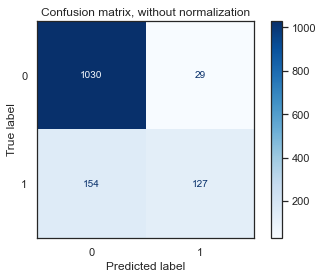

In [78]:
disp = plot_confusion_matrix(model, X_val, y_val,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix, without normalization")
plt.show()

## GradientBoostingClassifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
# define model
model = GradientBoostingClassifier(random_state=1)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train_set, y_train_set, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
#print('Mean ROC AUC: %.5f' % mean(scores))
print("Mean ROC AUC: %.5f " % (scores.mean()))

Mean ROC AUC: 0.85075 


## Tuning


In [28]:
# define grid
param_grid_1 = {'n_estimators':[10,50,100,500],'learning_rate':[0.001,0.01,0.1,1.0],'max_depth':[3,7,9],'subsample':[0.5,0.7,1.0]}
model = GradientBoostingClassifier(random_state=88)

In [29]:
# define evaluation procedure
from sklearn.model_selection import GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid_1, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid.fit(X_train_set, y_train_set)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.857500 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.794219 (0.000716) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.794219 (0.000716) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.794219 (0.000716) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.794219 (0.000716) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.794219 (0.000716) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.794219 (0.000716) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.794219 (0.000716) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.794219 (0.000716) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.794219 (0.000716) with: {'learning_rate': 0.001, 'max_dep

## Validation set

In [80]:
#Best: 0.857500 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
model=GradientBoostingClassifier(loss='exponential')
model.fit(X_train_set, y_train_set)
y_hat=model.predict(X_val)
gb_proba=model.predict_proba(X_val)
gb_probs=gb_proba[:,1]

In [81]:
gb_clf_class_report=classification_report(y_val, y_hat, digits=2)
print(gb_clf_class_report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1059
           1       0.78      0.46      0.58       281

    accuracy                           0.86      1340
   macro avg       0.82      0.71      0.75      1340
weighted avg       0.85      0.86      0.85      1340



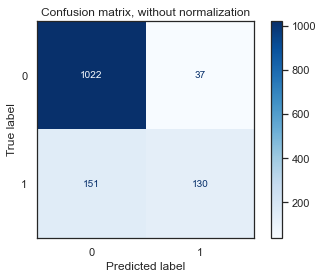

In [82]:
disp = plot_confusion_matrix(model, X_val, y_val,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix, without normalization")
plt.show()

## ROC curve

The ROC Curve is a useful diagnostic tool for understanding the trade-off for different thresholds and the ROC AUC provides a useful number for comparing models based on their general capabilities.

If crisp class labels are required from a model under such an analysis, then an optimal threshold is required. This would be a threshold on the curve that is closest to the top-left of the plot.

In [84]:
from sklearn.metrics import roc_auc_score

# auc scores
gb_auc_score = roc_auc_score(y_val, gb_probs)
#log_auc_score = roc_auc_score(y_val, lr_probs)
rf_auc_score = roc_auc_score(y_val, rf_probs)

print(gb_auc_score, rf_auc_score)

0.839792122427994 0.8379589957624697


In [220]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_val, gb_probs, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_val, lr_probs, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_val, rf_probs, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=1)

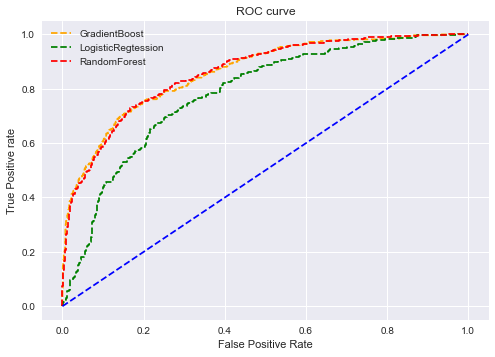

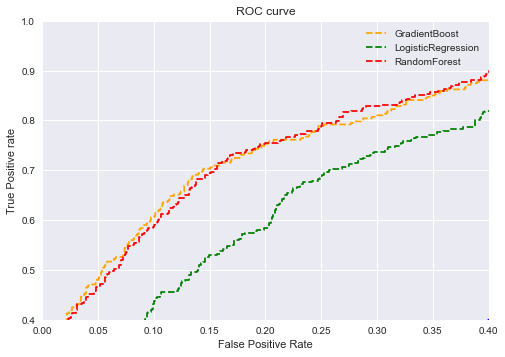

In [223]:
# matplotlib
import matplotlib.pyplot as plt
#plt.style.use('seaborn')

# plot roc curves
plt.figure(1)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='GradientBoost')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='LogisticRegtession')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='RandomForest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=200)
plt.show();

plt.figure(2)
plt.xlim(0, 0.4)
plt.ylim(0.4, 1)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='GradientBoost')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='LogisticRegression')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='RandomForest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROCzoom',dpi=200)
plt.show();

### not sure if I need it

## Threshold setting

There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

- Sensitivity = TruePositive / (TruePositive + FalseNegative)
- Specificity = TrueNegative / (FalsePositive + TrueNegative)
- Where:
- Sensitivity = True Positive Rate 
- Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

In [42]:
# calculate the g-mean for each threshold
from numpy import argmax
from numpy import sqrt

We can also re-draw the ROC Curve and highlight this point.

Best Threshold GBC=0.188927, G-Mean=0.776
Best Threshold Log =0.622309, G-Mean=0.723
Best Threshold RF=0.495407, G-Mean=0.780


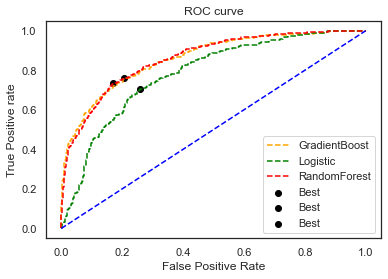

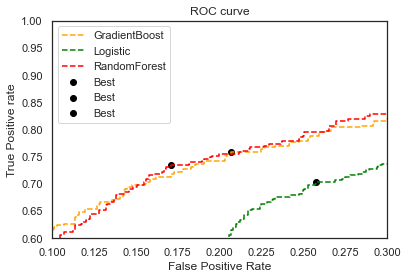

In [43]:
# plot roc curves
plt.figure(1)
# calculate the g-mean for each threshold
gmeans_gbc = sqrt(tpr1 * (1-fpr1))
gmeans_log = sqrt(tpr2 * (1-fpr2))
gmeans_rf = sqrt(tpr3 * (1-fpr3))
# locate the index of the largest g-mean
ix1 = argmax(gmeans_gbc)
ix2 = argmax(gmeans_log)
ix3 = argmax(gmeans_rf)
print('Best Threshold GBC=%f, G-Mean=%.3f' % (thresh1[ix1], gmeans_gbc[ix1]))
print('Best Threshold Log =%f, G-Mean=%.3f' % (thresh2[ix2], gmeans_log[ix2]))
print('Best Threshold RF=%f, G-Mean=%.3f' % (thresh3[ix3], gmeans_rf[ix3]))
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='GradientBoost')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='RandomForest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.scatter(fpr1[ix1], tpr1[ix1], marker='o', color='black', label='Best')
plt.scatter(fpr2[ix2], tpr2[ix2], marker='o', color='black', label='Best')
plt.scatter(fpr3[ix3], tpr3[ix3], marker='o', color='black', label='Best')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROCbest',dpi=200)
plt.show();

plt.figure(2)
plt.xlim(0.1, 0.3)
plt.ylim(0.6, 1)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='GradientBoost')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='RandomForest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.scatter(fpr1[ix1], tpr1[ix1], marker='o', color='black', label='Best')
plt.scatter(fpr2[ix2], tpr2[ix2], marker='o', color='black', label='Best')
plt.scatter(fpr3[ix3], tpr3[ix3], marker='o', color='black', label='Best')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROCbestzoom',dpi=200)
plt.show();